# WMAZE Model 5 Version 2.3.2
## LSS Model
## Removes last 3 noisy volumes (FSL ROI)

In [2]:
%matplotlib inline
import os
from os.path import join
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from glob import glob
from pylab import *

## Subjects and sets are affected by different index slices
### Beginning and end 10 trials removed to avoid selecting a target trial without a complete surrounding window

# Learning curve and derivative
### Visually demonstrates which potential target trials are affected by window-related index slicing

Subject WMAZE_020
Stimulus set1
Maximum Derivative
0.2245
Mean
0.0414259259259
STD
0.0699514872066
One-Sample t-test
Ttest_1sampResult(statistic=5.2968816018258762, pvalue=1.0123675996793091e-06)

Target Trial
8
Alternative Target Trial
35


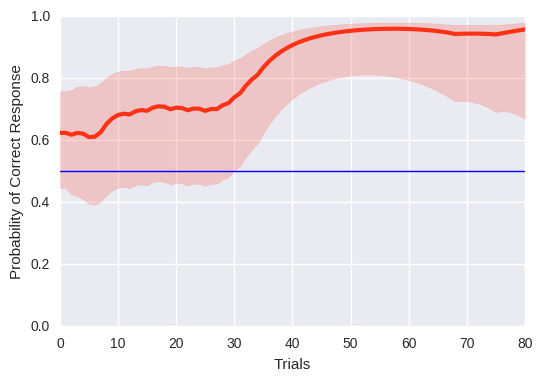

In [13]:
import seaborn as sns
#sns.set_style("ticks")
sns.set_palette('muted')
import matplotlib.pyplot as plt


#subs = ['WMAZE_001']

subs = ['WMAZE_020', ]


sets = ['set1']


for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    #new derivative files combining behavioral runs into set
    frst_deriv_files = glob(join(sub_dir, 'Bprime_pmode_set*.txt'))    
    frst_deriv_files.sort()
    lower_05_files = glob(join(sub_dir, 'B_p05_set*.txt'))
    lower_05_files.sort()
    upper_95_files = glob(join(sub_dir, 'B_p95_set*.txt'))
    upper_95_files.sort()
    #new learning files combining behavioral runs into set
    learning_files = glob(join(sub_dir, 'B_pmode_set*')) 
    learning_files.sort()
    #print learning_curves
    #print frst_deriv_files
    
    for i, curr_set in enumerate(sets): 
        #load learning curve and derivative files
        deriv_file = np.loadtxt(frst_deriv_files[i])
        learning_curve = np.loadtxt(learning_files[i]) 
        #print len(learning_curve)
        upper_95 = np.loadtxt(upper_95_files[i])
        lower_05 = np.loadtxt(lower_05_files[i])
        #plt.plot(deriv_file) #before shaving
        alt_lower_05 = lower_05[10:-10]
        alt_upper_95 = upper_95[10:-10]
        alt_deriv_file = deriv_file[10:-10]
        #plt.plot(learning_curve #)
        alt_learning_curve = learning_curve[10:-10] 
        #plt.plot(alt_deriv_file) #after shaving
        target_trial = np.argmax(deriv_file)
        #grabs the index of the largest derivative
        alt_target_trial = np.argmax(alt_deriv_file)+10
        #print target_trial
        #plt.plot(learning_curve)
        
        x = range(len(learning_curve))
        x1 = range(len(alt_learning_curve))
        chance = np.ones(len(x)) * 0.5
        chance1 = np.ones(len(x1)) * 0.5
        

        fig, ax0 = plt.subplots()  
        ax0.plot(x, learning_curve, "#fc3116", linewidth = 3)
        ax0.plot(x, chance, 'b', linewidth = 1)
        ax0.fill_between(x, learning_curve, upper_95, color = "#fc3116", alpha = 0.2)
        ax0.fill_between(x, learning_curve, lower_05, color = "#fc3116", alpha = 0.2)
        #ax0.plot(x, deriv_file, "#00CCCC", linewidth = 3)
        ax0.set_ylim(0,1)
        ax0.set_xlabel('Trials')
        ax0.set_ylabel('Probability of Correct Response')
        
        
        print 'Subject ' + sub
        print 'Stimulus ' + curr_set
        print "Maximum Derivative"
        print max((deriv_file))
        print "Mean"
        print np.mean(deriv_file)
        print "STD"
        print np.std(deriv_file)
        print "One-Sample t-test"
        print stats.ttest_1samp(deriv_file, 0)
        print ""
        print 'Target Trial'
        print target_trial
        print 'Alternative Target Trial'
        print alt_target_trial
        plt.savefig("/home/data/madlab/scripts/wmaze/anal_MR_thesis/fixed_before_conditional/model3/curve.jpg")
        plt.show()
